In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Read the data file

In [2]:
catch=pd.read_csv('EGOALLO_PROTOCOL_OUTCOMES_AND_PERFORMANCES.csv')
catch.head()

,rat,session_nr,performance,catch_session,catch_nr,outcome
0,1,1,53.3,0,NaN,NaN
1,1,2,40.0,0,NaN,NaN
2,1,3,80.0,1,1.0,E
3,1,4,33.3,0,NaN,NaN
4,1,5,53.3,0,NaN,NaN


#####  Check distribution of catch trials across sessions

In [3]:
session_counts=catch.groupby(['session_nr'])['catch_session'].sum().reset_index()

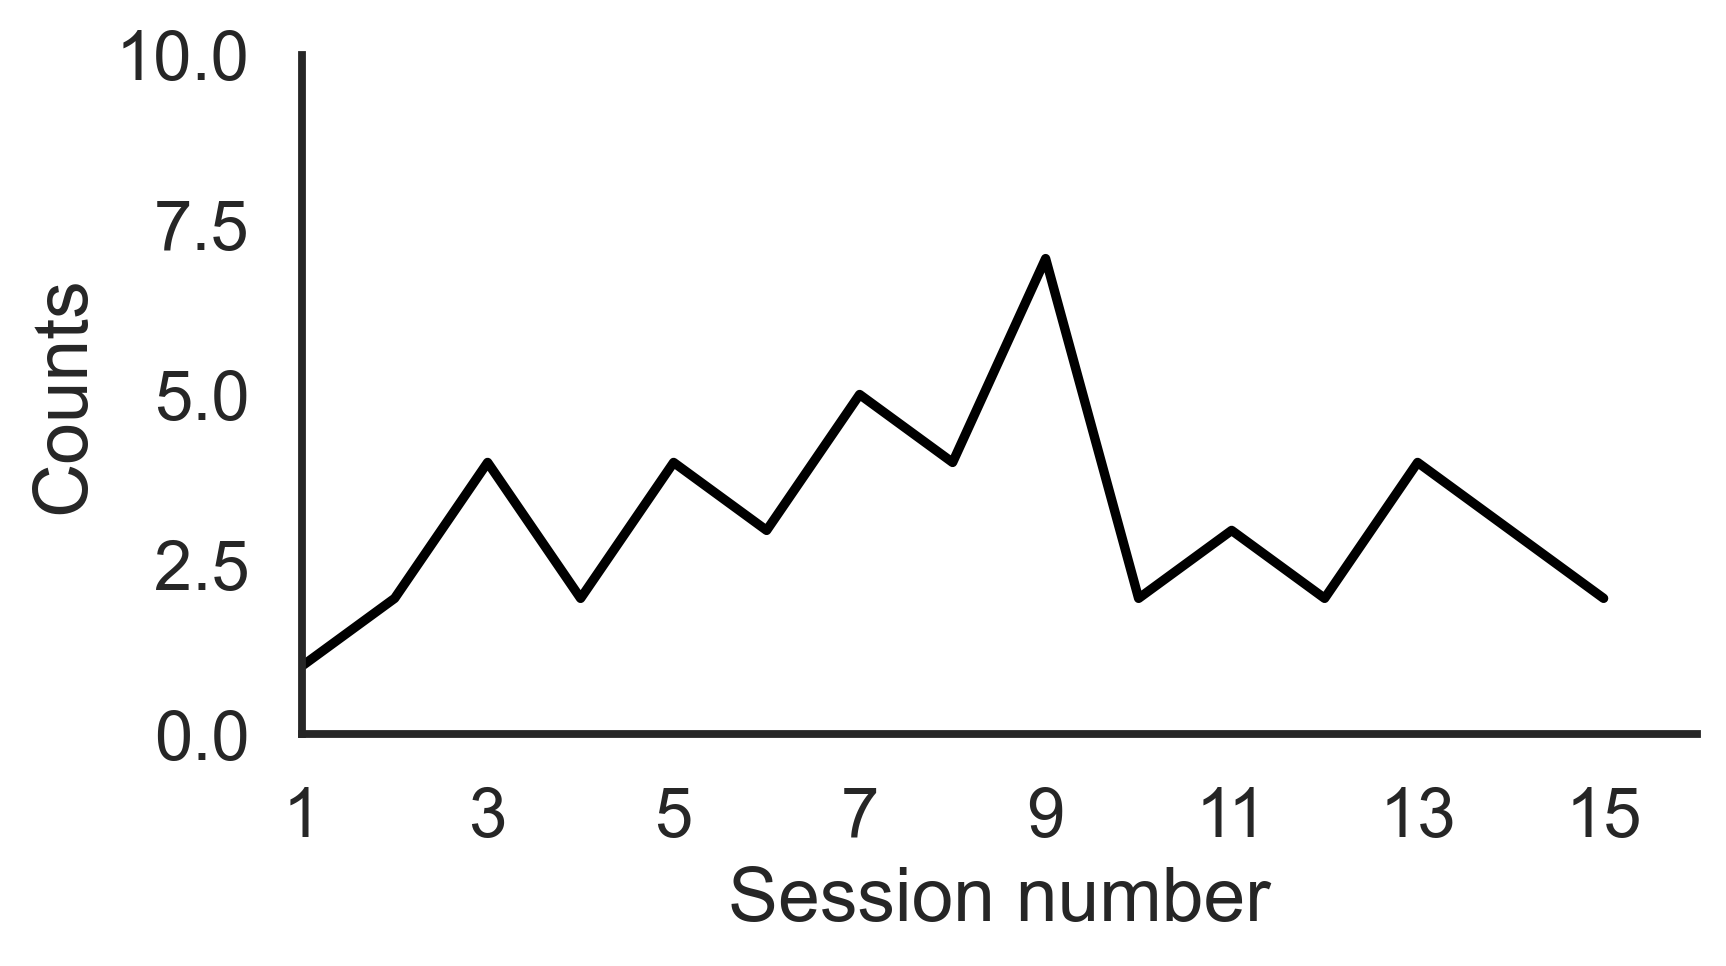

In [15]:
sns.set(context='talk', style='white')
plt.figure(figsize=(6,3), dpi=300)
g=sns.lineplot(data=session_counts, x='session_nr', y='catch_session', color='black')
g.set(xlim=[1,16], ylim=[0,10], xlabel='Session number', ylabel='Counts', xticks=range(1,16, 2))
sns.despine()

###### Catch trials were performed from the 2nd to the 16th session. But most catch trials were performed in the 8th session of learning. Let's subdivide by catch number

In [23]:
session_counts_by_catch_nr=catch.groupby(['session_nr', 'catch_nr'])['outcome'].count().reset_index()
session_counts_by_catch_nr = session_counts_by_catch_nr.rename(columns={'outcome':'counts'})
session_counts_by_catch_nr

,session_nr,catch_nr,counts
0,1,1.0,1
1,2,1.0,2
2,3,1.0,4
3,4,2.0,2
4,5,1.0,2
5,5,3.0,2
6,6,1.0,1
7,6,2.0,1
8,6,4.0,1
9,7,1.0,2


In [35]:
session_counts_by_catch_nr= catch.pivot_table(
    index='session_nr', 
    columns='catch_nr',  
    fill_value=0, 
    aggfunc='count').unstack().reset_index()

,level_0,catch_nr,session_nr,0
0,catch_session,1.0,1,1
1,catch_session,1.0,2,2
2,catch_session,1.0,3,4
3,catch_session,1.0,4,0
4,catch_session,1.0,5,2
...,...,...,...,...
235,rat,4.0,11,2
236,rat,4.0,12,0
237,rat,4.0,13,2
238,rat,4.0,14,2


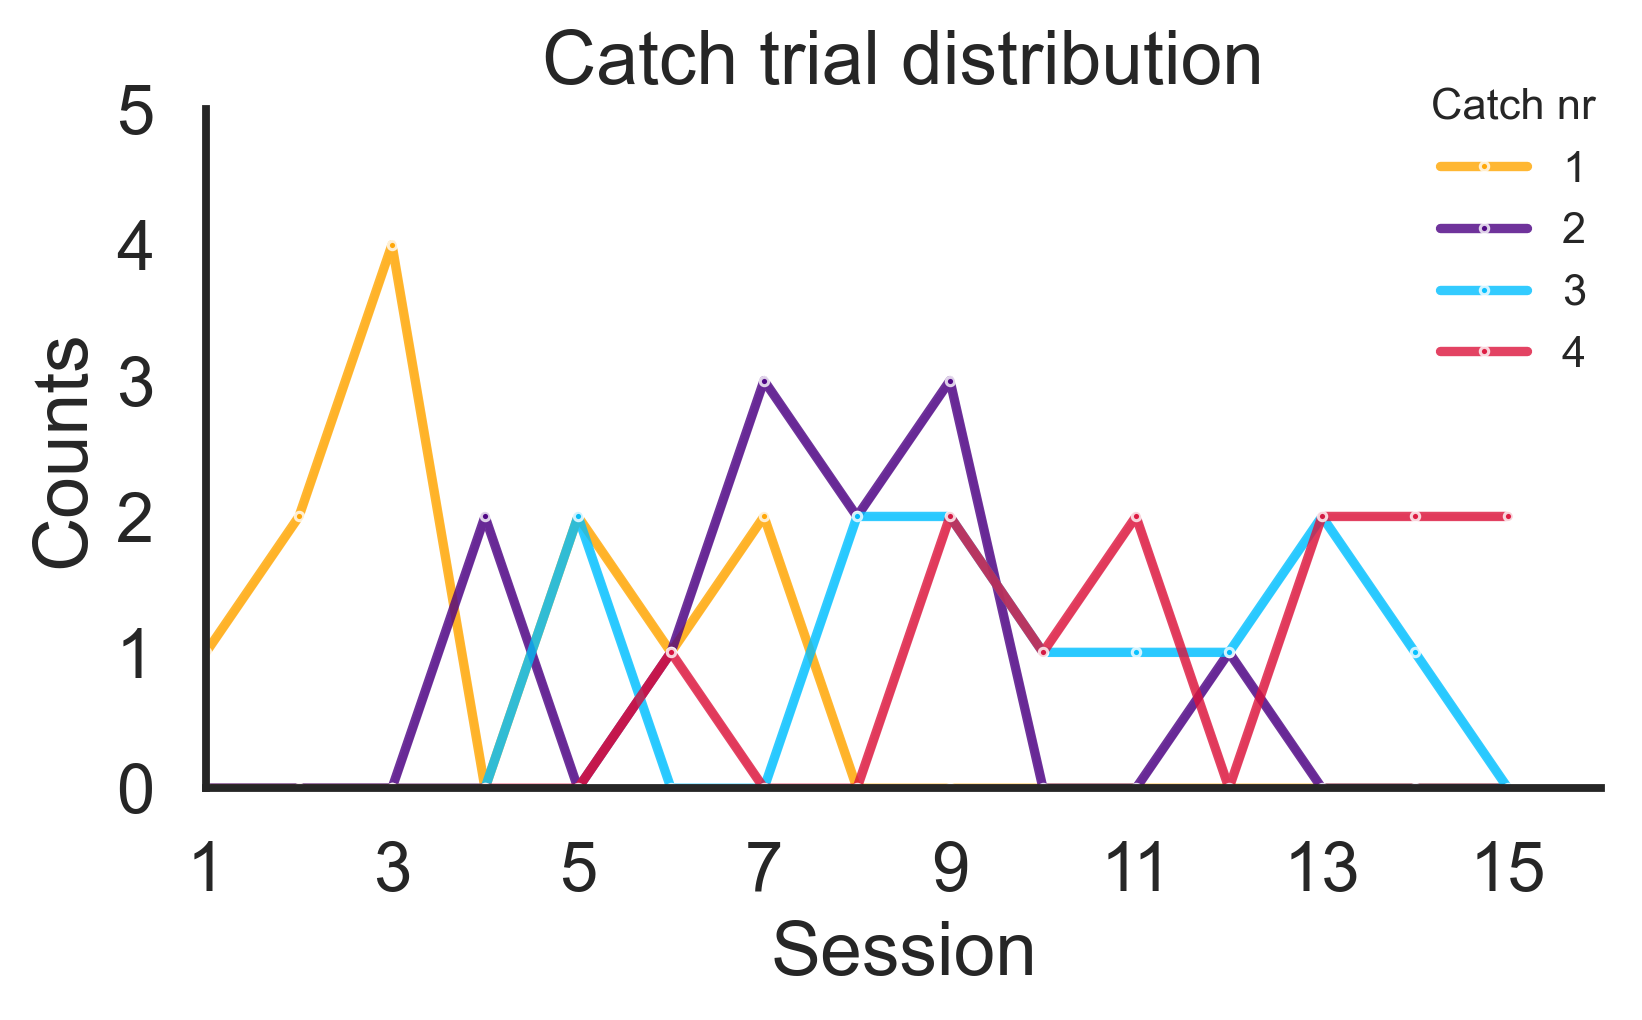

In [101]:
sns.set(context='talk', style='white')
plt.figure(figsize=(6,3), dpi=300)
color_scheme=['orange', 'indigo', 'deepskyblue', 'crimson']
g=sns.lineplot(
    data=session_counts_by_catch_nr, 
    x='session_nr', y=0, hue='catch_nr', alpha=.8,
    palette=color_scheme, marker='o', markersize=2, legend=False)

g.set(
    xlim=[1,16], ylim=[0,5], 
    xlabel='Session', ylabel='Counts', 
    xticks=range(1,16,2), yticks=range(0,6,1),
    title='Catch trial distribution')

plt.legend(title='Catch nr', labels=['1', '2', '3', '4'],
          frameon=False, bbox_to_anchor=[.85,.55], fontsize='xx-small',
          title_fontsize='xx-small')
sns.despine()

##### At which sessions do rats start and finish the catch protocol? How long does it take to complete it?

In [56]:
first_catch=catch[catch['catch_nr']==1].reset_index(drop=True)
last_catch = catch[catch['catch_nr']==4].reset_index(drop=True)

#Calculate protocol duration
protocol_duration=(last_catch['session_nr']-first_catch['session_nr'])+1

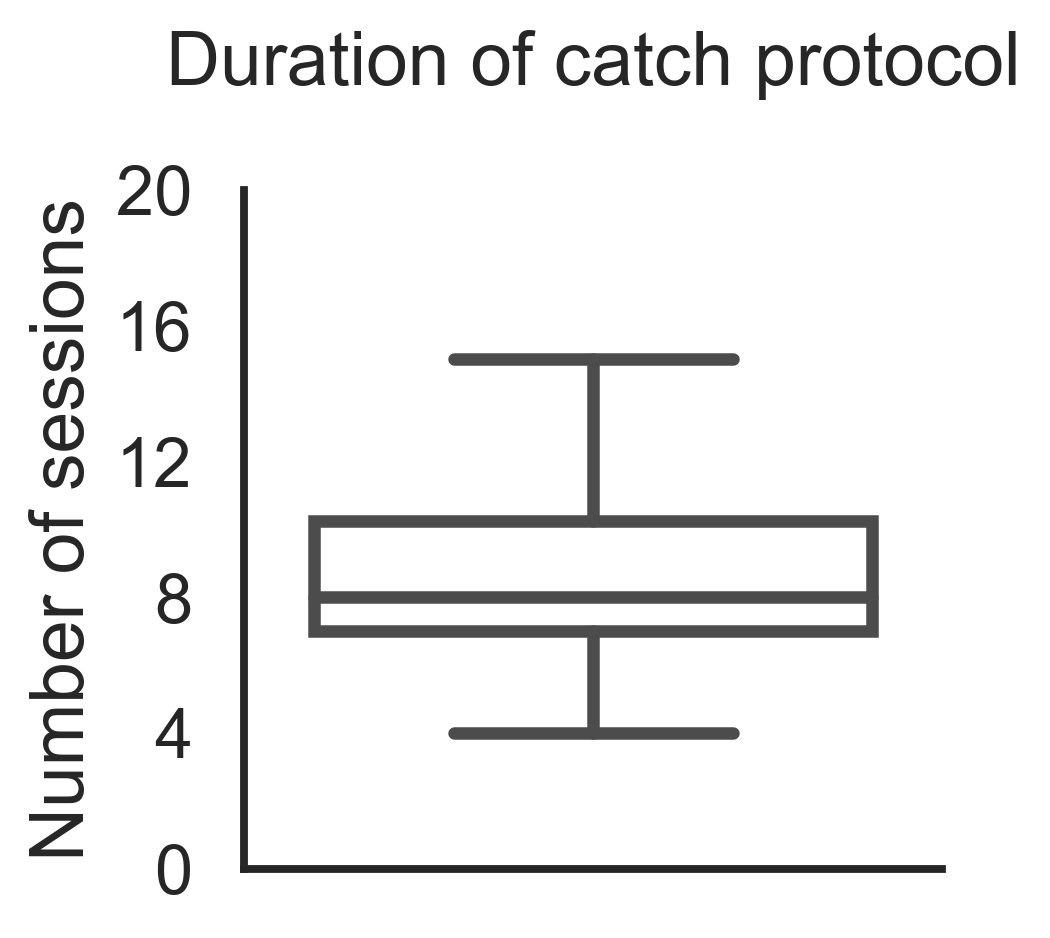

In [58]:
PROPS = {
    'boxprops':{'facecolor':'none'}}
plt.figure(figsize=(3,3), dpi=300) 
sns.set(style='white', context='talk')
g=sns.boxplot(data=protocol_duration, linewidth=3, **PROPS)
g.set(ylim=[0,20], xticks=[0], xticklabels='', ylabel='Number of sessions',
     title='Duration of catch protocol\n', yticks=range(0, 22, 4))
sns.despine()

##### How many sessions from the start of the behavioral training

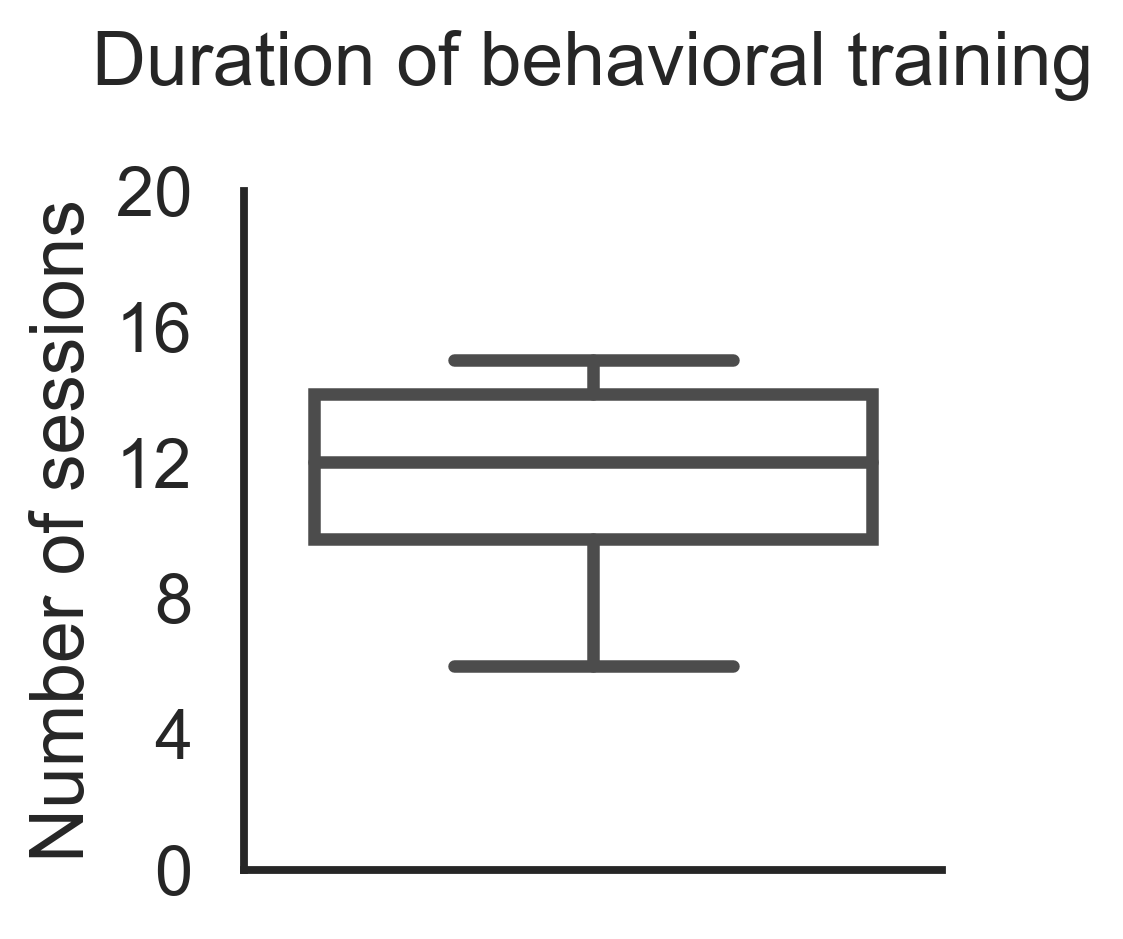

In [59]:
sns.set(style='white', context='talk')
plt.figure(figsize=(3,3), dpi=300) 
g=sns.boxplot(data=last_catch, y='session_nr',linewidth=3, **PROPS)
g.set(ylim=[0,20], xticks=[0], xticklabels='', ylabel='Number of sessions',
     title='Duration of behavioral training\n', yticks=range(0, 22, 4))
sns.despine()

##### Distribution of performances and catch sessions

In [61]:
# Get three example rats (chose distinct performance patterns)
rats=[1,5,10]
example_rats=catch[catch['rat'].isin(rats)]

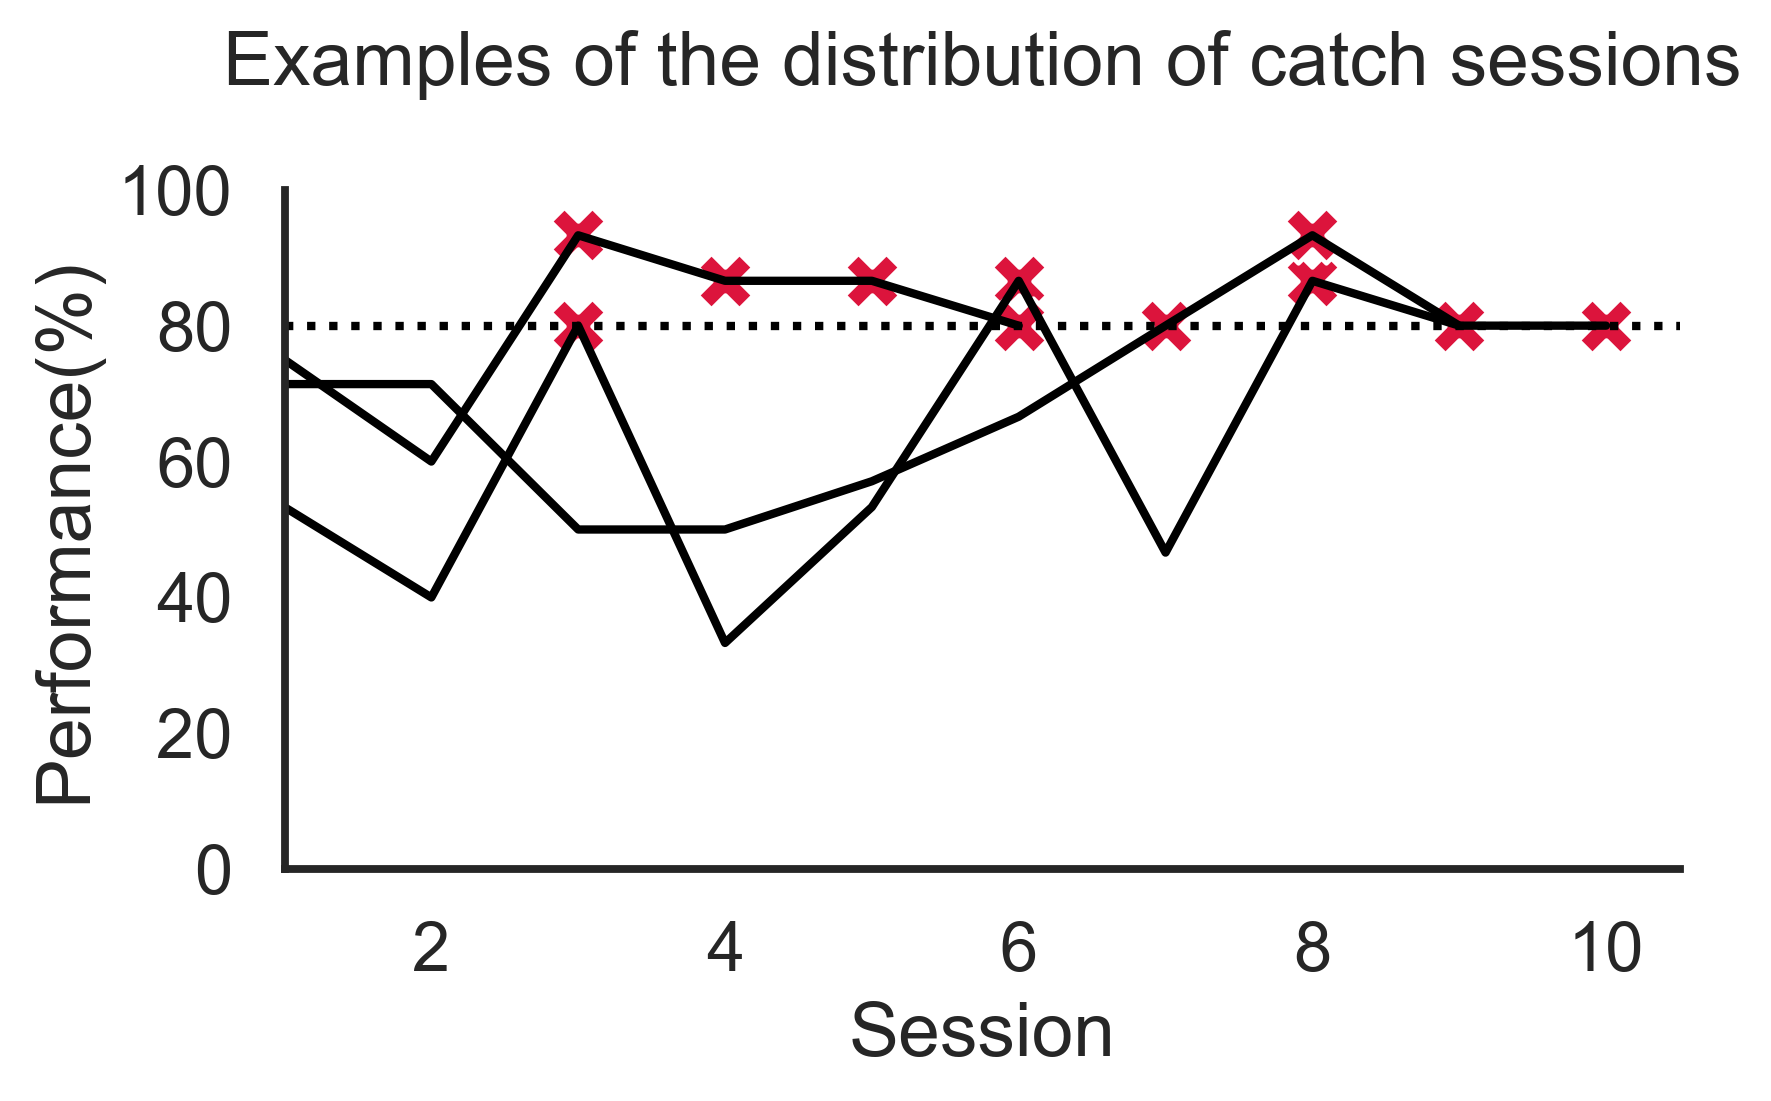

In [73]:
sns.set(style='white', context='talk')
plt.figure(figsize=(6,3), dpi=300)
g=sns.lineplot(data=example_rats, 
            x='session_nr', y='performance', hue='rat',
            linewidth=2, palette=['black']*3,legend=False)

above80=example_rats[example_rats['performance']>=80]

sns.scatterplot(
    data=above80, x='session_nr', y='performance', 
    s=180, legend=False, marker='X', c=['crimson'], alpha=1
 )

plt.axhline(80, linestyle=':', color='black', linewidth=2)
g.set(xlabel='Session', ylabel='Performance(%)',
     title='Examples of the distribution of catch sessions\n',
     yticks=range(0,110,20), xlim=[1,10.5])
sns.despine()

#### 